In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
%matplotlib inline

In [116]:
### Import data set
file_path = "./data/"

bikesharing = pd.read_csv(f"{file_path}chicago_2017_prepared.csv", parse_dates=["start_time", "end_time"])

In [118]:
### Dropping all rows not equal "Customers" and "Subscriber"
bikesharing = bikesharing.drop(bikesharing[(bikesharing["user_type"] != "Customer") & (bikesharing["user_type"] != "Subscriber")].index)
bikesharing.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,start_hour,start_day,start_month,start_weekday,max_temp,min_temp,precip,start_lat,start_long,end_lat,end_long
0,2017-01-01 00:00:36,2017-01-01 00:06:32,414,191,Canal St & Taylor St,Canal St & Monroe St (*),2511,Customer,0,1,1,6,-0.6,-0.6,0.0,41.870257,-87.639474,41.880884,-87.639525
1,2017-01-01 00:02:54,2017-01-01 00:08:21,28,20,Larrabee St & Menomonee St,Sheffield Ave & Kingsbury St,3660,Subscriber,0,1,1,6,-0.6,-0.6,0.0,41.914680,-87.643320,41.910522,-87.653106
2,2017-01-01 00:06:06,2017-01-01 00:18:31,620,333,Orleans St & Chestnut St (NEXT Apts),Ashland Ave & Blackhawk St,4992,Subscriber,0,1,1,6,-0.6,-0.6,0.0,41.898203,-87.637536,41.907066,-87.667252
3,2017-01-01 00:07:28,2017-01-01 00:12:51,287,68,Franklin St & Monroe St,Clinton St & Tilden St,5637,Subscriber,0,1,1,6,-0.6,-0.6,0.0,41.880317,-87.635185,41.875885,-87.640795
4,2017-01-01 00:07:57,2017-01-01 00:20:53,300,118,Broadway & Barry Ave,Sedgwick St & North Ave,2209,Subscriber,0,1,1,6,-0.6,-0.6,0.0,41.937725,-87.644095,41.911386,-87.638677


In [119]:
### Add column 'Day of year' 
bikesharing['day_of_year'] = bikesharing['start_time'].dt.dayofyear

### Calculate and add column trip duration in seconds
bikesharing['duration'] = bikesharing["end_time"] - bikesharing["start_time"]
def get_seconds(x):
    return x.seconds
bikesharing["duration"] = bikesharing["duration"].apply(lambda x: get_seconds(x))

In [120]:
bikesharing.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,start_hour,start_day,...,start_weekday,max_temp,min_temp,precip,start_lat,start_long,end_lat,end_long,day_of_year,duration
0,2017-01-01 00:00:36,2017-01-01 00:06:32,414,191,Canal St & Taylor St,Canal St & Monroe St (*),2511,Customer,0,1,...,6,-0.6,-0.6,0.0,41.870257,-87.639474,41.880884,-87.639525,1,356
1,2017-01-01 00:02:54,2017-01-01 00:08:21,28,20,Larrabee St & Menomonee St,Sheffield Ave & Kingsbury St,3660,Subscriber,0,1,...,6,-0.6,-0.6,0.0,41.914680,-87.643320,41.910522,-87.653106,1,327
2,2017-01-01 00:06:06,2017-01-01 00:18:31,620,333,Orleans St & Chestnut St (NEXT Apts),Ashland Ave & Blackhawk St,4992,Subscriber,0,1,...,6,-0.6,-0.6,0.0,41.898203,-87.637536,41.907066,-87.667252,1,745
3,2017-01-01 00:07:28,2017-01-01 00:12:51,287,68,Franklin St & Monroe St,Clinton St & Tilden St,5637,Subscriber,0,1,...,6,-0.6,-0.6,0.0,41.880317,-87.635185,41.875885,-87.640795,1,323
4,2017-01-01 00:07:57,2017-01-01 00:20:53,300,118,Broadway & Barry Ave,Sedgwick St & North Ave,2209,Subscriber,0,1,...,6,-0.6,-0.6,0.0,41.937725,-87.644095,41.911386,-87.638677,1,776


In [130]:
### Selecting features relevant for clustering
bikesharing_relevant = bikesharing[["user_type", "start_hour", "start_weekday", "min_temp", "precip", "duration", "start_lat", "start_long"]]
bikesharing_relevant

,user_type,start_hour,start_weekday,min_temp,precip,duration,start_lat,start_long
0,Customer,0,6,-0.6,0.0,356,41.870257,-87.639474
1,Subscriber,0,6,-0.6,0.0,327,41.914680,-87.643320
2,Subscriber,0,6,-0.6,0.0,745,41.898203,-87.637536
3,Subscriber,0,6,-0.6,0.0,323,41.880317,-87.635185
4,Subscriber,0,6,-0.6,0.0,776,41.937725,-87.644095
...,...,...,...,...,...,...,...,...
3828949,Subscriber,23,6,-12.8,0.0,120,41.939743,-87.658865
3828950,Subscriber,23,6,-12.8,0.0,300,41.896544,-87.630931
3828951,Subscriber,23,6,-12.8,0.0,600,41.913688,-87.652855
3828952,Subscriber,23,6,-12.8,0.0,300,41.954245,-87.654406


In [132]:
### Defining continuous, ordinal & categorical columns
continuous_cols = ["min_temp", "start_lat", "start_long"]
ordinal_cols = ["start_hour", "start_weekday", "duration"]
categorical_cols = ["user_type", "precip"]

bikesharing_relevant.sample(200, random_state=200)
### Scaling all columns that are not categorical
bikesharing_transformed = pd.DataFrame(StandardScaler().fit_transform(bikesharing_relevant[continuous_cols + ordinal_cols]), columns=bikesharing_relevant[continuous_cols + ordinal_cols].columns)
bikesharing_transformed

,min_temp,start_lat,start_long,start_hour,start_weekday,duration
0,-1.911782,-0.786277,0.092580,-2.964342,1.553288,-0.380665
1,-1.911782,0.429100,-0.073456,-2.964342,1.553288,-0.399067
2,-1.911782,-0.021698,0.176245,-2.964342,1.553288,-0.133819
3,-1.911782,-0.511044,0.277740,-2.964342,1.553288,-0.401605
4,-1.911782,1.059592,-0.106913,-2.964342,1.553288,-0.114148
...,...,...,...,...,...,...
3828942,-3.249360,1.114803,-0.744548,1.990494,1.553288,-0.530422
3828943,-3.249360,-0.067087,0.461389,1.990494,1.553288,-0.416200
3828944,-3.249360,0.401959,-0.485090,1.990494,1.553288,-0.225831
3828945,-3.249360,1.511566,-0.552048,1.990494,1.553288,-0.416200


In [129]:
#bikesharing_transformed["user_type"] = LabelEncoder().fit_transform(bikesharing_relevant["user_type"])
### Re-adding categorical columns to data frame
bikesharing_transformed["user_type"] = bikesharing_relevant["user_type"]
bikesharing_transformed["precip"] = bikesharing_relevant["precip"]
bikesharing_transformed

,min_temp,start_lat,start_long,start_hour,start_weekday,duration,user_type,precip
0,-1.911782,-0.786277,0.092580,-2.964342,1.553288,-0.380665,Customer,0.0
1,-1.911782,0.429100,-0.073456,-2.964342,1.553288,-0.399067,Subscriber,0.0
2,-1.911782,-0.021698,0.176245,-2.964342,1.553288,-0.133819,Subscriber,0.0
3,-1.911782,-0.511044,0.277740,-2.964342,1.553288,-0.401605,Subscriber,0.0
4,-1.911782,1.059592,-0.106913,-2.964342,1.553288,-0.114148,Subscriber,0.0
...,...,...,...,...,...,...,...,...
3828942,-3.249360,1.114803,-0.744548,1.990494,1.553288,-0.530422,Subscriber,0.0
3828943,-3.249360,-0.067087,0.461389,1.990494,1.553288,-0.416200,Subscriber,0.0
3828944,-3.249360,0.401959,-0.485090,1.990494,1.553288,-0.225831,Subscriber,0.0
3828945,-3.249360,1.511566,-0.552048,1.990494,1.553288,-0.416200,Subscriber,0.0


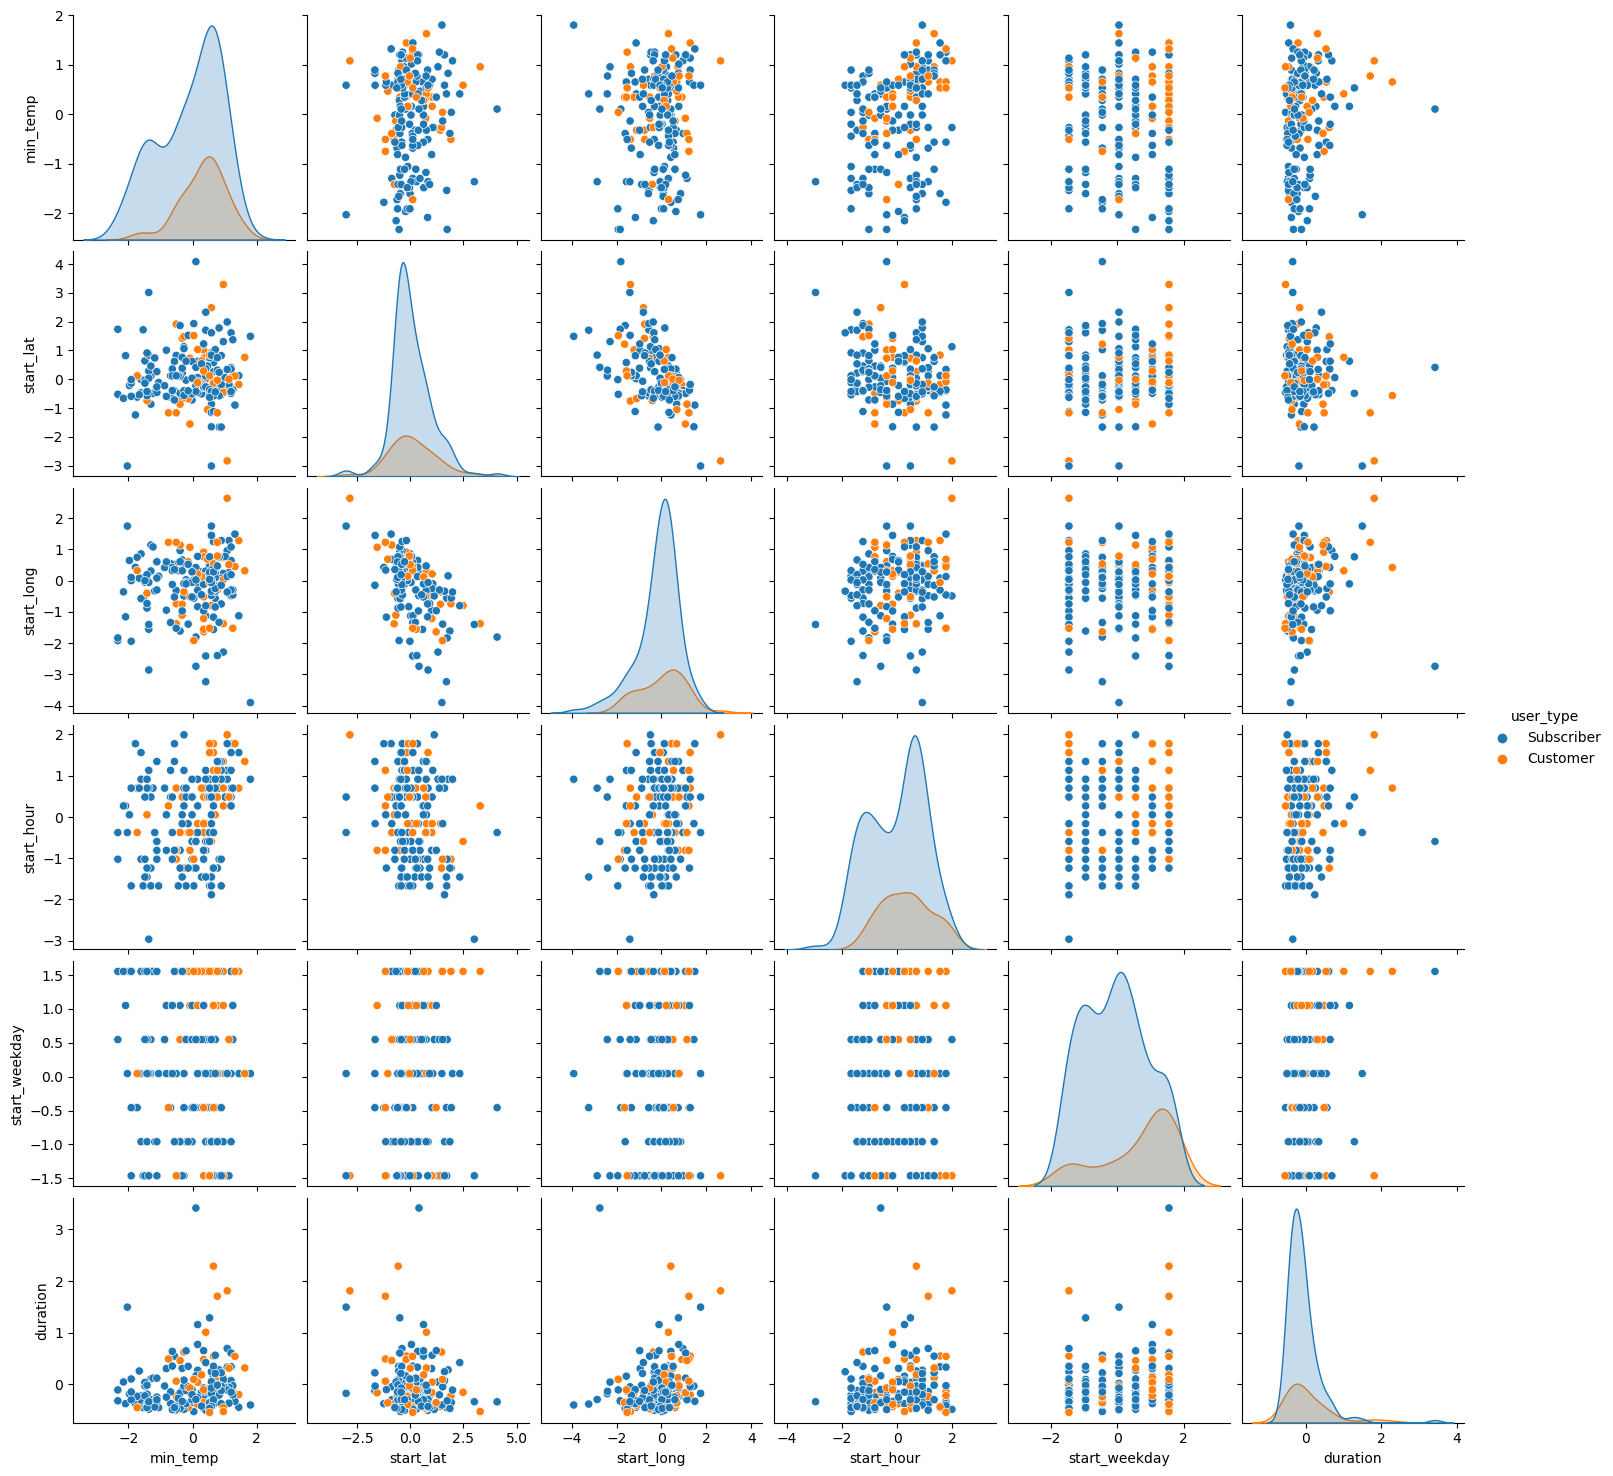

In [125]:
### Plotting with sample data set of 200 entries
sns.pairplot(data=bikesharing_transformed.sample(200, random_state=200)[continuous_cols + ordinal_cols + ["user_type"]], hue='user_type')

In [126]:
### New data frame with sample of 200 data points to conduct clustering
bikesharing_sample = bikesharing_transformed.sample(200, random_state=200)[continuous_cols + ordinal_cols]

c:\Users\annal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


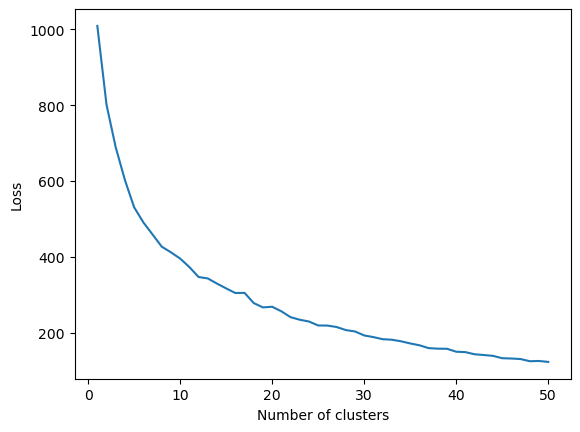

In [105]:
### Running kmeans with k_max = 50
k_max = 50
clusters = []
losses = []

for k in range(k_max):
    model = KMeans(n_clusters=k+1)
    model.fit(bikesharing_sample)
    clusters.append(k+1)
    losses.append(model.inertia_)

plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

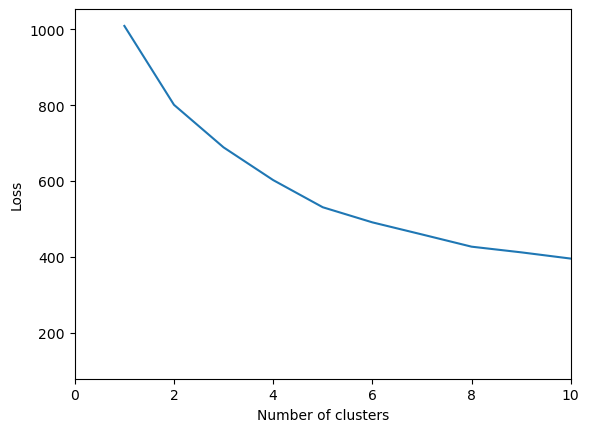

In [106]:
### Zooming in
plt.plot(clusters, losses)
plt.xlim([0,10])
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

In [107]:
### The optimal amount of clusters lies between 5 and 6, which is why we are starting with five 
five_means = KMeans(n_clusters=5)
five_means.fit(bikesharing_sample)
five_means.predict(bikesharing_sample)

array([4, 0, 0, 1, 3, 3, 2, 3, 1, 4, 1, 2, 1, 4, 4, 4, 3, 1, 3, 1, 2, 1,
       1, 2, 2, 2, 1, 0, 4, 2, 1, 1, 1, 0, 0, 0, 1, 4, 3, 2, 0, 1, 0, 2,
       2, 3, 2, 0, 0, 2, 0, 2, 0, 2, 3, 0, 4, 1, 1, 1, 2, 3, 3, 2, 2, 2,
       0, 3, 0, 0, 2, 4, 2, 0, 3, 2, 2, 4, 2, 2, 2, 2, 0, 0, 1, 4, 3, 0,
       3, 1, 1, 2, 2, 3, 0, 3, 4, 3, 3, 4, 1, 3, 4, 2, 0, 1, 1, 0, 3, 4,
       1, 3, 3, 0, 2, 2, 2, 1, 0, 0, 3, 2, 1, 4, 4, 0, 2, 2, 3, 4, 3, 1,
       1, 2, 0, 2, 1, 2, 2, 4, 3, 3, 2, 2, 2, 0, 1, 2, 1, 4, 0, 3, 3, 2,
       4, 3, 3, 3, 0, 0, 1, 2, 1, 1, 1, 2, 4, 1, 2, 0, 2, 4, 2, 2, 1, 3,
       3, 3, 4, 2, 1, 0, 1, 4, 1, 1, 3, 3, 3, 3, 0, 1, 4, 3, 1, 4, 1, 2,
       2, 3])

In [69]:
## Add assigned clusters as a new column -> not necessary 
## five_means.labels_
## bikesharing_sample['categories'] = five_means.labels_
## bikesharing_sample.head()

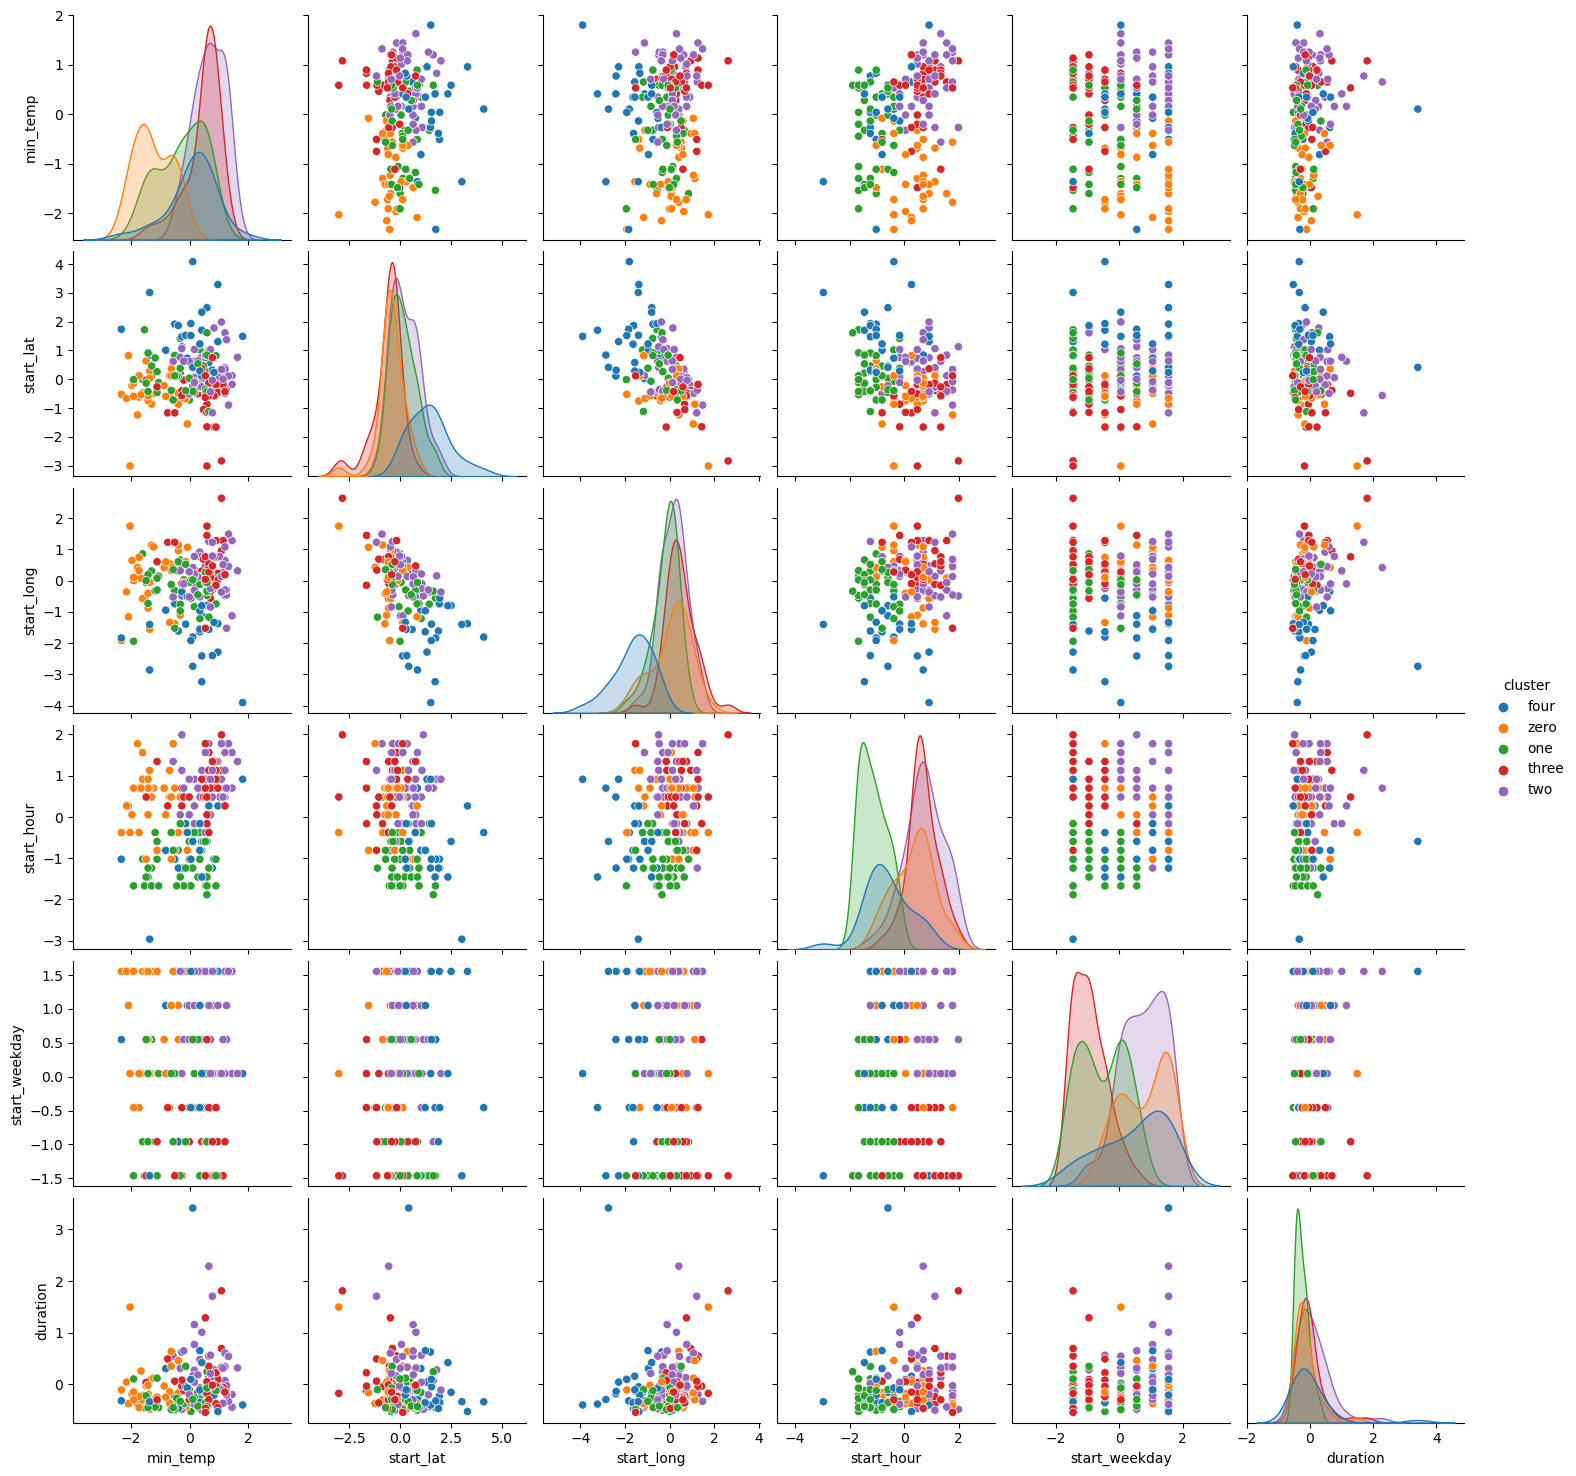

In [108]:
numbers = ["zero", "one", "two", "three", "four"]

bikesharing_sample["cluster"] = five_means.predict(bikesharing_sample)
bikesharing_sample["cluster"] = bikesharing_sample["cluster"].apply(lambda x: numbers[x])
sns.pairplot(data=bikesharing_sample, hue="cluster")

In [109]:
bikesharing_sample.head()

,min_temp,start_lat,start_long,start_hour,start_weekday,duration,cluster
1818173,0.653736,0.576894,-1.564364,0.267073,1.050558,0.154907,four
3345318,-0.508422,-0.758782,-1.384470,0.697928,1.553288,-0.301979,zero
41418,-1.604797,-0.462509,0.077081,1.559638,1.553288,-0.426988,zero
3589945,-1.539015,1.714708,-0.562150,-1.671776,-1.463095,-0.454274,one
2375757,1.081322,-2.839447,2.629260,1.990494,-1.463095,1.808582,three


# Interpreting the clustering outcome

In [111]:
### Looking at cluster "zero"
bikesharing_sample[bikesharing_sample.values  == "zero"].describe()

,min_temp,start_lat,start_long,start_hour,start_weekday,duration
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,-1.237042,-0.465639,0.080928,0.347089,0.792010,-0.125371
std,0.635672,0.656439,0.869862,0.737220,0.755292,0.389094
min,-2.328405,-3.016352,-1.920861,-1.025493,-0.457634,-0.484733
25%,-1.725399,-0.670663,-0.384480,-0.379210,0.045097,-0.378127
50%,-1.363595,-0.493507,0.314910,0.482500,1.050558,-0.234715
75%,-0.656433,-0.180545,0.599363,0.697928,1.553288,-0.034193
max,-0.080836,0.816232,1.739119,1.775066,1.553288,1.493203


In [112]:
### Looking at cluster "one"
bikesharing_sample[bikesharing_sample.values  == "one"].describe()

,min_temp,start_lat,start_long,start_hour,start_weekday,duration
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,-0.262236,0.135877,-0.176973,-1.138103,-0.537614,-0.254805
std,0.800986,0.645846,0.587716,0.488361,0.726855,0.213180
min,-1.911782,-1.124328,-1.941721,-1.887203,-1.463095,-0.530422
25%,-1.070314,-0.409576,-0.462911,-1.671776,-1.086047,-0.432223
50%,-0.168546,0.062051,-0.031503,-1.240921,-0.457634,-0.300075
75%,0.483797,0.475521,0.273855,-0.810065,0.045097,-0.119859
max,0.894938,1.714708,0.850608,-0.163783,0.547827,0.345277


In [113]:
### Looking at cluster "two"
bikesharing_sample[bikesharing_sample.values  == "two"].describe()

,min_temp,start_lat,start_long,start_hour,start_weekday,duration
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,0.660562,0.226875,0.173889,0.722316,0.756508,0.118953
std,0.531402,0.694954,0.615077,0.720290,0.686157,0.543972
min,-0.563241,-1.169005,-1.525294,-1.240921,-0.960364,-0.504405
25%,0.280968,-0.369698,-0.302564,0.482500,0.045097,-0.220755
50%,0.708554,0.108806,0.225719,0.697928,1.050558,-0.029116
75%,1.136141,0.746384,0.505380,1.128783,1.553288,0.314818
max,1.629509,1.986384,1.482986,1.990494,1.553288,2.287043


In [114]:
### Looking at cluster "three"
bikesharing_sample[bikesharing_sample.values  == "three"].describe()

,min_temp,start_lat,start_long,start_hour,start_weekday,duration
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,0.450772,-0.631052,0.457581,0.671656,-0.935841,-0.008222
std,0.599518,0.720756,0.699136,0.555943,0.526683,0.448371
min,-1.484196,-3.016352,-1.525294,-0.810065,-1.463095,-0.546286
25%,0.346750,-0.632300,0.035551,0.482500,-1.463095,-0.263905
50%,0.653736,-0.495531,0.334121,0.697928,-0.960364,-0.073536
75%,0.829156,-0.268646,0.756967,0.913356,-0.457634,0.048301
max,1.201923,0.746384,2.629260,1.990494,0.547827,1.808582


In [115]:
### Looking at cluster "four"
bikesharing_sample[bikesharing_sample.values  == "four"].describe()

,min_temp,start_lat,start_long,start_hour,start_weekday,duration
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,0.085245,1.429343,-1.634502,-0.618574,0.473349,0.015350
std,0.839985,1.007125,0.873332,0.854081,1.040652,0.748002
min,-2.328405,0.017699,-3.901940,-2.964342,-1.463095,-0.530422
25%,-0.201437,0.652404,-2.103663,-1.133207,-0.457634,-0.341005
50%,0.346750,1.472934,-1.557324,-0.810065,0.547827,-0.184584
75%,0.500243,1.887440,-0.957510,-0.163783,1.553288,0.066703
max,1.804929,4.082481,-0.361535,0.913356,1.553288,3.413394


In [93]:
### Running Principal Component Analysis
bikesharing_sample = bikesharing_transformed.sample(200, random_state=200)[continuous_cols + ordinal_cols]
pca = PCA(n_components=1)
X_pca = pca.fit_transform(bikesharing_sample)
pca.components_

array([[ 0.18601305, -0.60975802,  0.58559251,  0.49103244, -0.03515444,
         0.09125248]])

In [75]:
pca.explained_variance_ratio_[0]

0.32048419992767246

In [76]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(bikesharing_sample)
sum(pca.explained_variance_ratio_)

0.7489764048057757

In [77]:
bikesharing_pca = pd.DataFrame(X_pca, columns=["First PC", "Second PC", "Third PC"], index=bikesharing_sample.index)
bikesharing_pca.head()

,First PC,Second PC,Third PC
1818173,-0.953009,1.496828,0.214473
3345318,-0.097204,1.179182,-1.058249
41418,0.785796,0.920700,-1.698792
3589945,-2.387052,-2.014852,0.153903
2375757,4.750948,-0.970025,0.901876


c:\Users\annal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


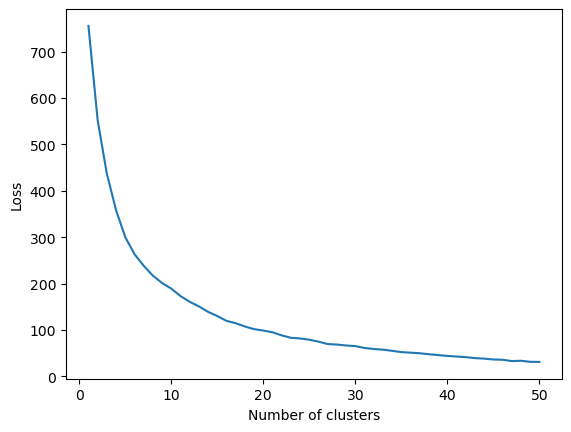

In [78]:
pca_clusters = []
pca_losses = []

for i in range(k_max):
    model = KMeans(n_clusters=i+1)
    model.fit(X_pca)
    pca_clusters.append(i+1)
    pca_losses.append(model.inertia_)
    
plt.plot(pca_clusters, pca_losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

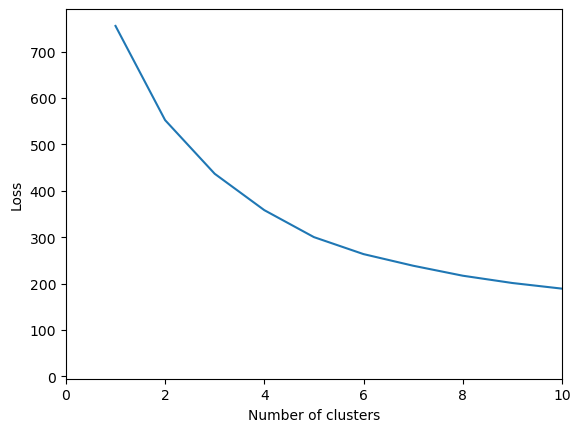

In [79]:
plt.plot(pca_clusters, pca_losses)
plt.xlim([0,10])
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

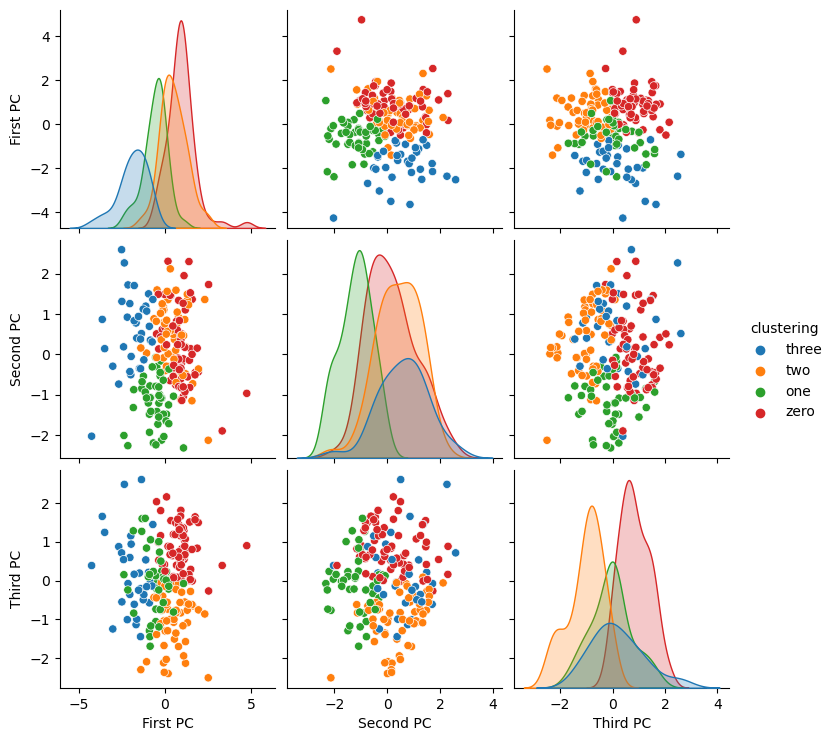

In [80]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(bikesharing_pca)
kmeans.predict(bikesharing_pca)
numbers = ["zero", "one", "two", "three"]
bikesharing_pca["clustering"] = kmeans.predict(bikesharing_pca)
bikesharing_pca["clustering"] = bikesharing_pca["clustering"].apply(lambda x: numbers[x])
sns.pairplot(data=bikesharing_pca, hue="clustering")

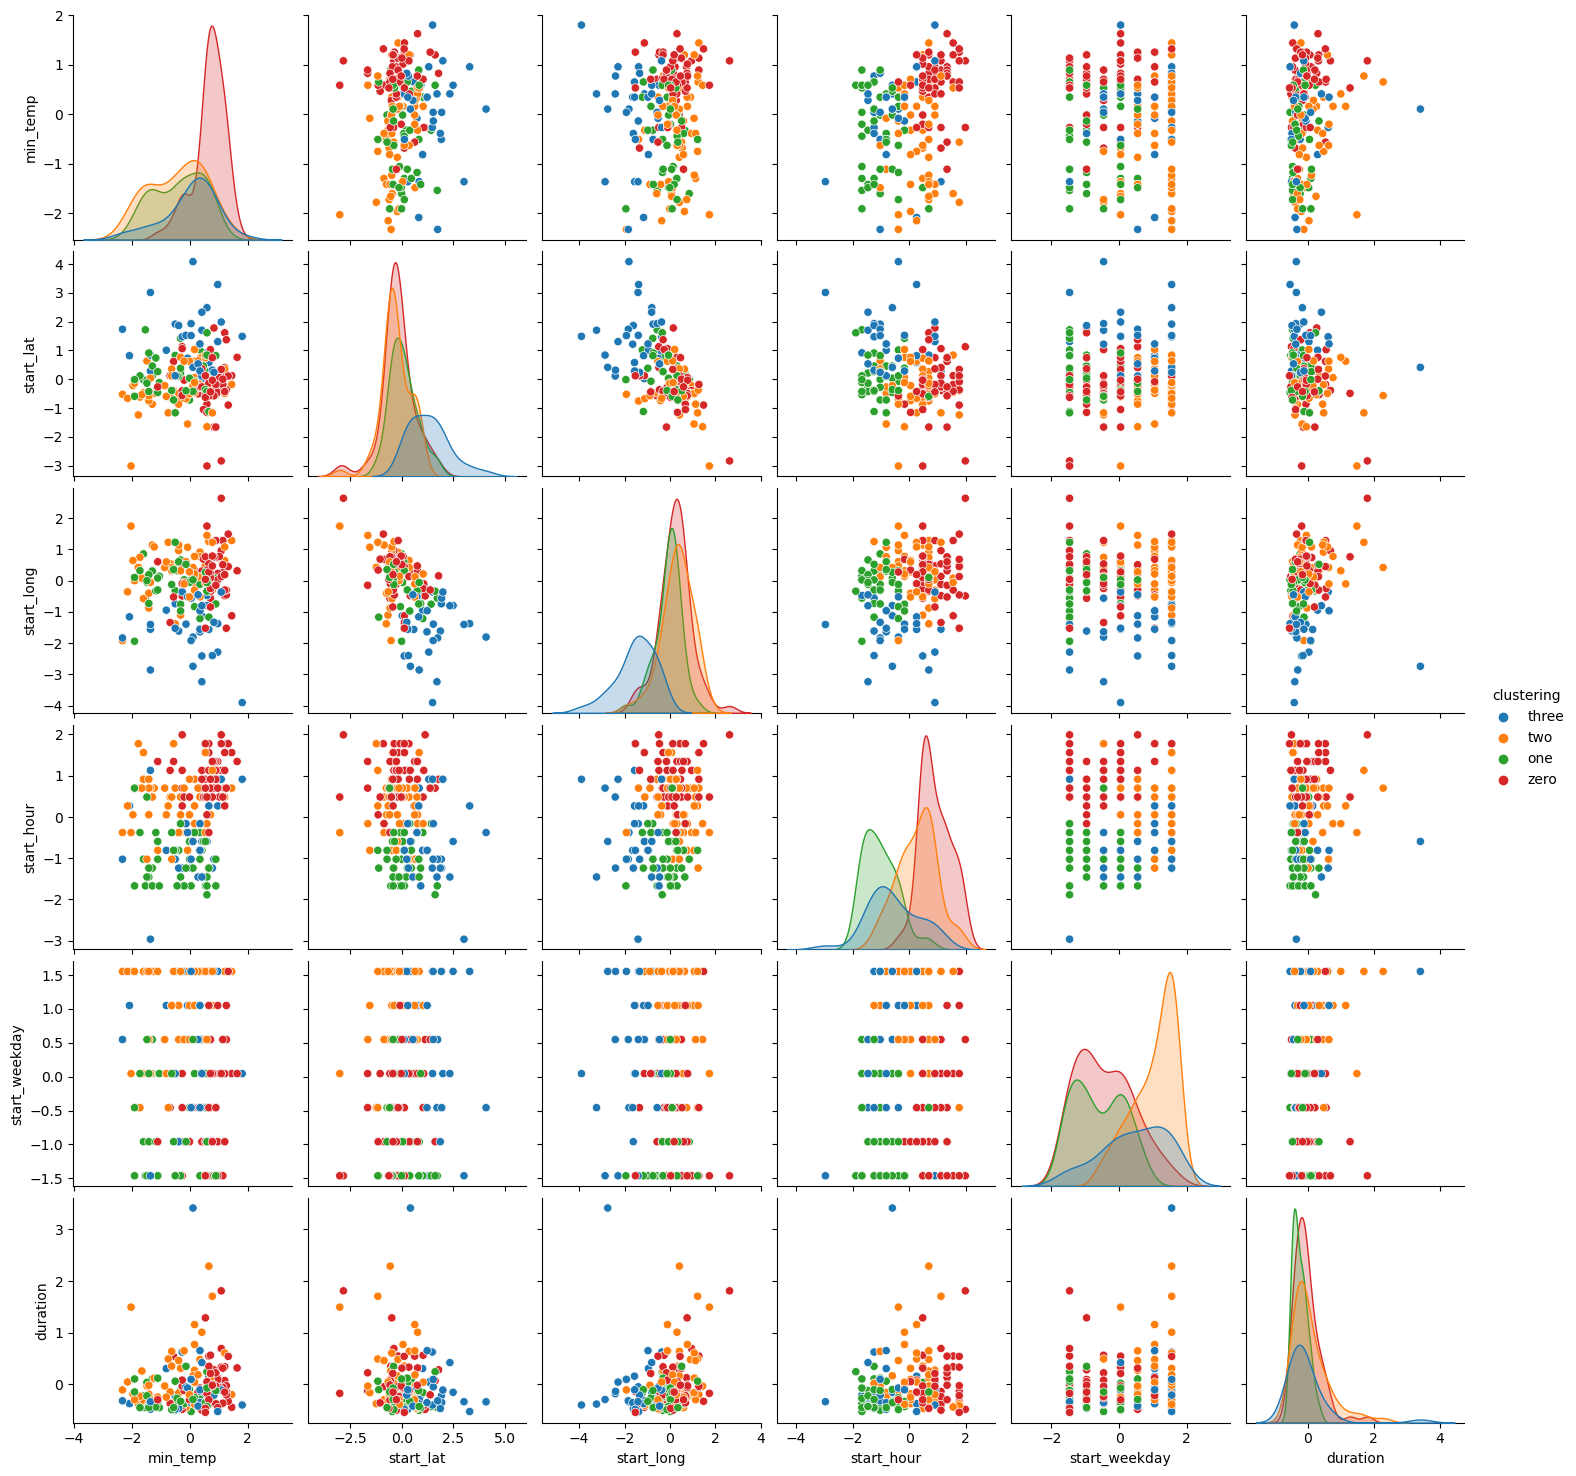

In [81]:
bikesharing_sample["clustering"] = bikesharing_pca["clustering"]
sns.pairplot(data=bikesharing_sample, hue="clustering")

In [82]:
def interpret(x):
    if x == "zero":
        x = "Leisure Trips"
    elif x == "one":
        x = "Afternoon Trip Warm"
    elif x == "two":
        x = "Afternoon Trip Cold"
    else:
        x = "Morning Trip"
    return x
        
bikesharing_sample["clustering"] = bikesharing_sample["clustering"].apply(lambda x: interpret(x))

In [83]:
bikesharing_sample

,min_temp,start_lat,start_long,start_hour,start_weekday,duration,clustering
1818173,0.653736,0.576894,-1.564364,0.267073,1.050558,0.154907,Morning Trip
3345318,-0.508422,-0.758782,-1.384470,0.697928,1.553288,-0.301979,Afternoon Trip Cold
41418,-1.604797,-0.462509,0.077081,1.559638,1.553288,-0.426988,Afternoon Trip Cold
3589945,-1.539015,1.714708,-0.562150,-1.671776,-1.463095,-0.454274,Afternoon Trip Warm
2375757,1.081322,-2.839447,2.629260,1.990494,-1.463095,1.808582,Leisure Trips
...,...,...,...,...,...,...,...
906271,0.039765,1.514188,-1.919428,-1.025493,1.553288,0.092720,Morning Trip
3678622,-0.563241,-0.722284,0.350397,-0.810065,-0.960364,-0.454274,Afternoon Trip Warm
2553516,0.708554,-0.442290,-0.845611,0.913356,0.045097,0.207576,Leisure Trips
2606609,0.774337,-1.169005,1.220464,1.128783,1.553288,1.703879,Afternoon Trip Cold


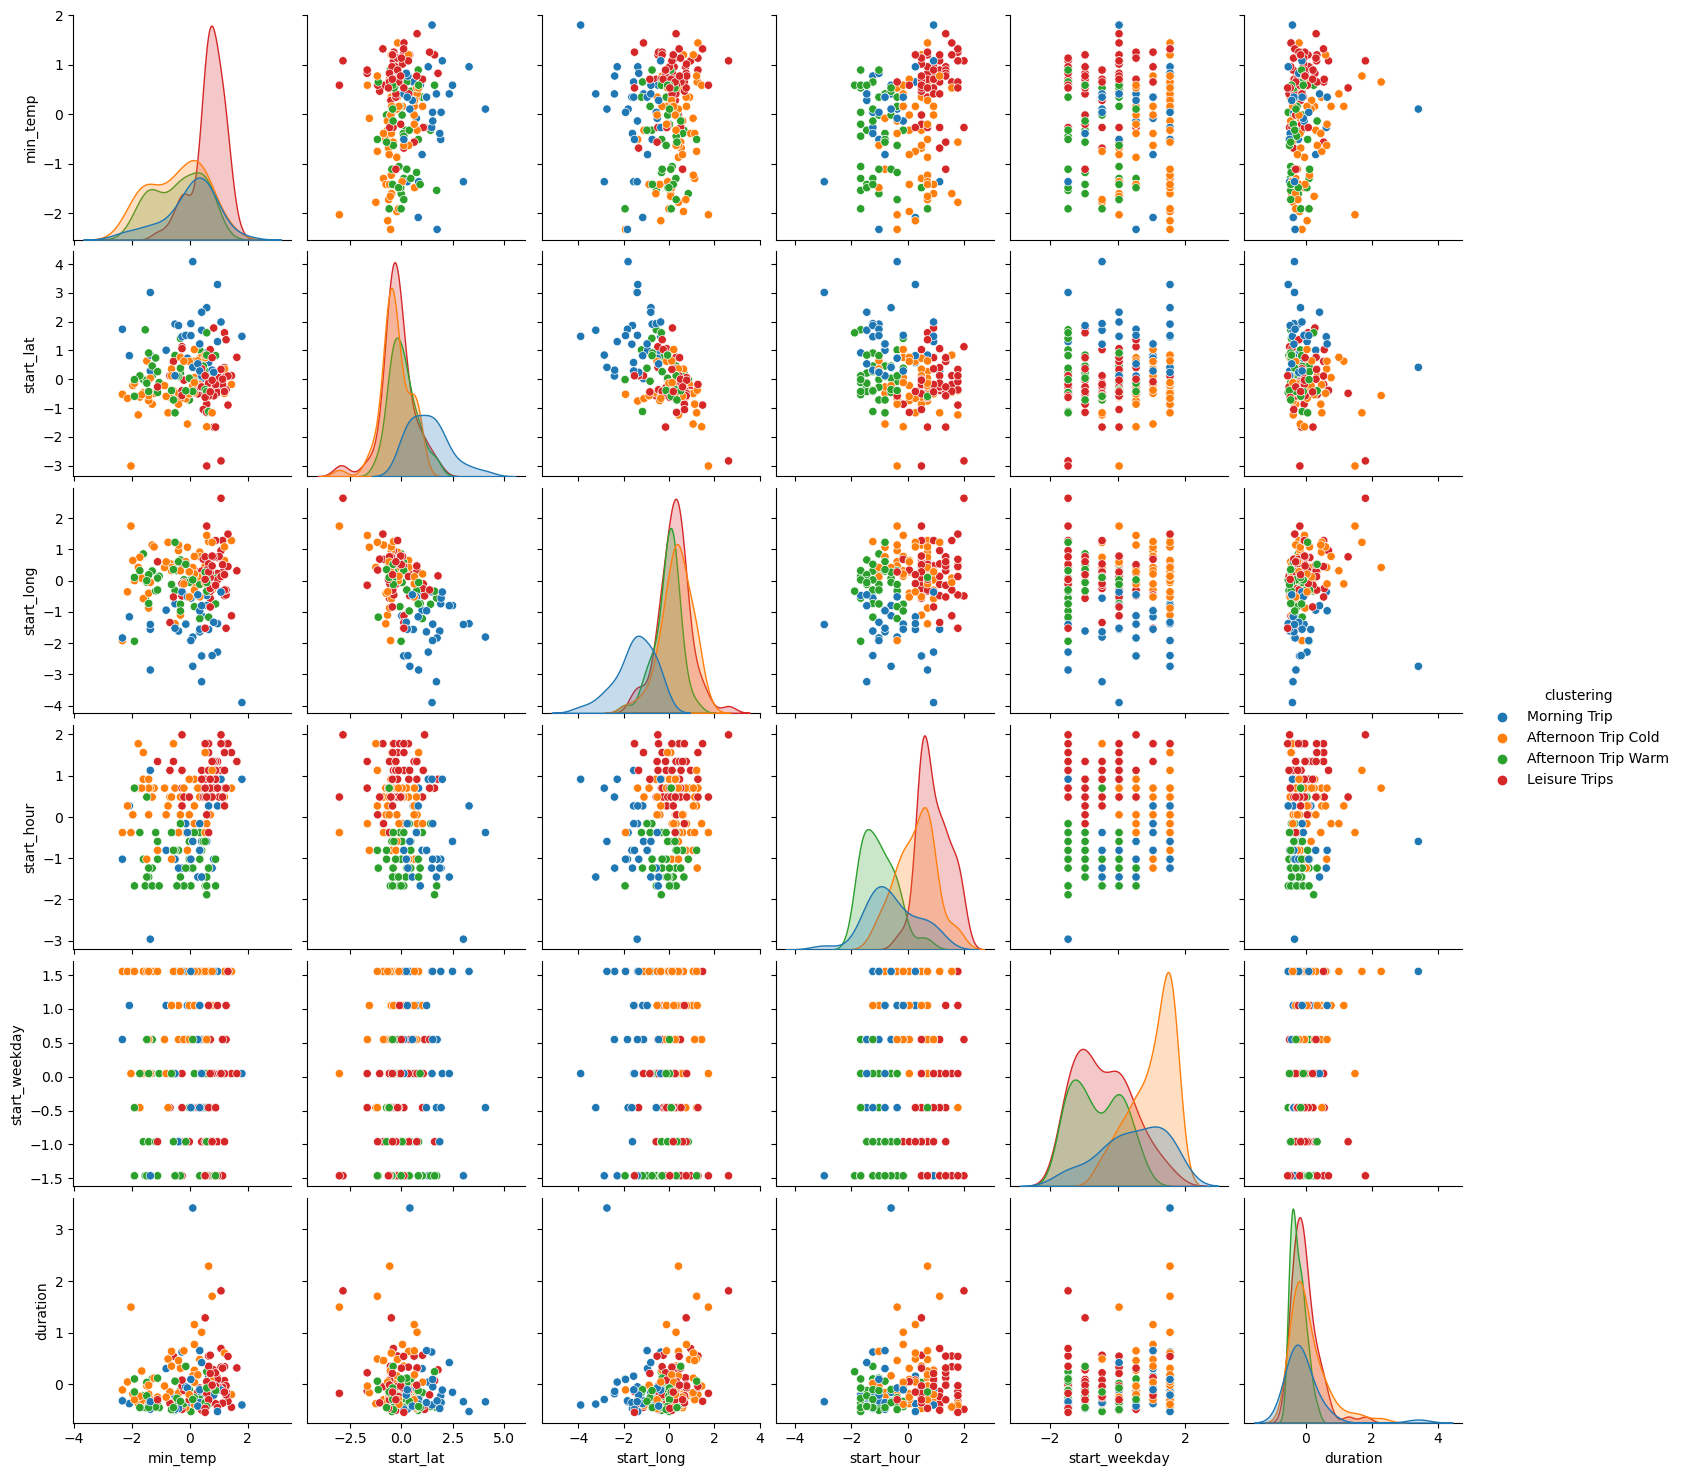

In [84]:
sns.pairplot(data=bikesharing_sample, hue="clustering")